In [1]:
%matplotlib widget

# Xsuite example for a secondary beam line
Based on: https://gitlab.cern.ch/acc-models/acc-models-ea/-/blob/en-ea-le/H6/scenarios/positive-120gev-fm-focus/


In [2]:
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt

### Load lattice and strengths

In [3]:
# Load lattice and strengths
env = xt.load_madx_lattice('h6fm04.seq')
env.vars.load_madx('h6-fm.str')

# Select the line
line = env['h6']

# Associate a reference particle
line.particle_ref = xt.Particles(p0c=120e9, mass0=xt.PROTON_MASS_EV)

### Survey

In [4]:
sv = line.survey()

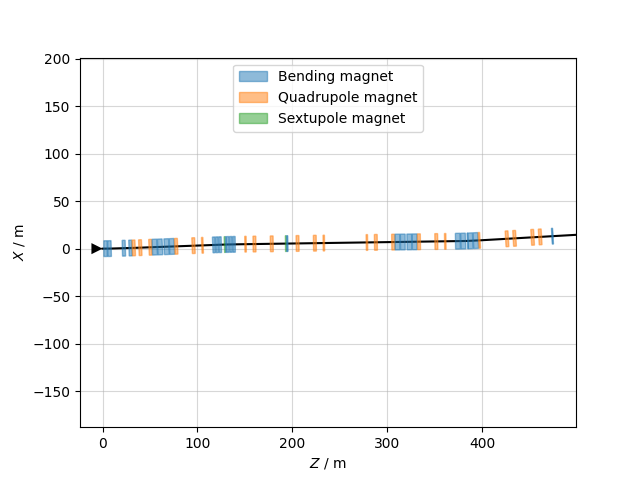

In [5]:
sv.plot(projection='ZX')

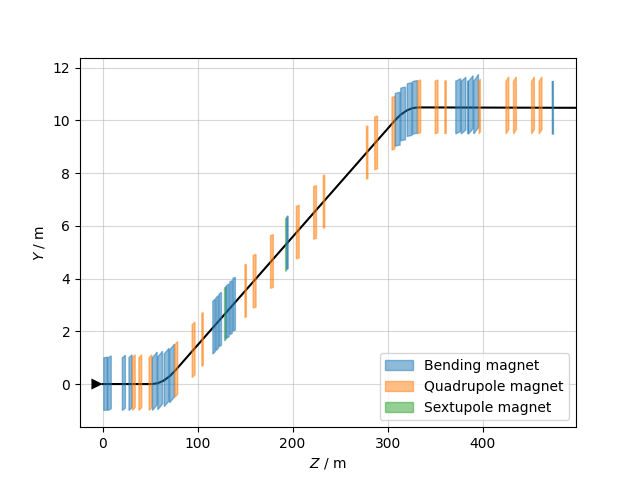

In [6]:
# XY cut (not yet supported in production version)
sv.plot(projection='ZY', axis=None, element_width=2)

### Inspect the lattice using tables

In [7]:
tt = line.get_table(attr=True)
tt_bend = tt.rows[tt.element_type=='Bend']
tt_quad = tt.rows[tt.element_type=='Quadrupole']

In [8]:
tt_bend.cols['s', 'length', 'angle_rad', 'k0l', 'rot_s_rad'].show()

name                       s        length     angle_rad           k0l     rot_s_rad
mtn.x0400003         1.35002       3.60002       -0.0126       -0.0126  -0.000261799
mtn.x0400007         5.55007       3.60002       -0.0126       -0.0126  -0.000266356
msn.x0410022         20.8501           3.2       -0.0056       -0.0056  -0.000270954
msn.x0410029         27.8301       3.20001        -0.007        -0.007  -0.000273011
mbnv.x0410055        52.4851       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410061        58.1452       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410067        64.9552       5.00002     -0.010254     -0.010254       1.57052
mbnv.x0410073        70.6153       5.00002     -0.010254     -0.010254       1.57052
mbxhc.x0410117        116.17           2.5     0.0039634     0.0039634  -0.000275377
mbxhc.x0410121        119.47           2.5     0.0039634     0.0039634  -0.000436564
mbxhc.x0410124        122.77           2.5     0.0039634     0.00

In [9]:
tt_quad.cols['s', 'length', 'k1l', 'rot_s_rad'].show()

name                     s        length           k1l     rot_s_rad
qsl.x0410033       31.4201             3     0.0648872             0
qnl.x0410040       38.2851          2.99    -0.0199256             0
qnl.x0410050       48.9451          2.99    -0.0277722             0
qnl.x0410078       76.1653          2.99    -0.0309024             0
qnl.x0410096       94.3933          2.99      0.073996             0
qts.x0410106       104.589          1.49    -0.0523803             0
qts.x0410151       150.021          1.49    -0.0523803             0
qnl.x0410160       158.717          2.99     0.0740119             0
qnl.x0410178       176.945          2.99    -0.0310116             0
qnl.x0410206       204.165          2.99    -0.0310116             0
qnl.x0410224       222.393          2.99     0.0740119             0
qts.x0410234       232.589          1.49    -0.0523803             0
qts.x0410279       278.021          1.49    -0.0523803             0
qnl.x0410288       286.717        

In [10]:
# Access table with regular expressions
tt_quad.rows['qts.*'].cols['s', 'length', 'k1l', 'rot_s_rad'].show()

name                     s        length           k1l     rot_s_rad
qts.x0410106       104.589          1.49    -0.0523803             0
qts.x0410151       150.021          1.49    -0.0523803             0
qts.x0410234       232.589          1.49    -0.0523803             0
qts.x0410279       278.021          1.49    -0.0523803             0
qts.x0410362       360.589          1.49    -0.0531526             0
qts.x0410397       396.521          1.49     0.0188032             0


### Inspection of knobs and element properties

In [11]:
# Information about one element
line.info('qts.x0410279')

Element of type:  Quadrupole
k1                  -0.03515453708625                vars['kq6']
k1s                 0.0                              None       
length              1.49                             None       
num_multipole_kicks 0                                None       
order               5                                None       
inv_factorial_order 0.008333333333333333             None       
knl                 [0. 0. 0. 0. 0. 0.]              None       
ksl                 [0. 0. 0. 0. 0. 0.]              None       
edge_entry_active   0                                None       
edge_exit_active    0                                None       
_sin_rot_s          -999.0                           None       
_cos_rot_s          -999.0                           None       
_shift_x            0.0                              None       
_shift_y            0.0                              None       
_shift_s            0.0                              None    

In [12]:
# Information about one knob
line.info('kq6')

#  vars['kq6']._get_value()
   vars['kq6'] = -0.03515453708625

#  vars['kq6']._expr is None

#  vars['kq6']._find_dependant_targets()
   element_refs['qts.x0410279'].k1
   element_refs['qts.x0410234'].k1
   element_refs['qts.x0410151'].k1
   element_refs['qts.x0410106'].k1
   element_refs['q6d'].k1



### Twiss

In [13]:
tw = line.twiss(betx=10, bety=10, alfx=0, alfy=0, strengths=True)

In [14]:
tw.cols['betx bety k0l k1l']

TwissTable: 225 rows, 5 cols
name                  betx          bety           k0l           k1l
t4..centre              10            10             0             0
drift_1                 10            10             0             0
beg.vac::0         10.1212       10.1212             0             0
drift_2            10.1212       10.1212             0             0
mtn.x0400003       10.1823       10.1823       -0.0126             0
drift_3            12.4502       12.4486             0             0
mtn.x0400007       13.0802        13.078       -0.0126             0
drift_4            18.3721       18.3635             0             0
end.vac::0         37.5922       37.5576             0             0
drift_5            37.5922       37.5576             0             0
...
xsci.x0410530         64.47       266.331             0             0
drift_103            64.733       268.405             0             0
h6b                 75.2059       352.075             0             

In [15]:
tw.rows['q.*|mb.*'].cols['betx bety k0l k1l']

TwissTable: 41 rows, 5 cols
name                   betx          bety           k0l           k1l
qsl.x0410033        108.721       108.584             0     0.0648872
qnl.x0410040        78.2672       268.169             0    -0.0199256
qnl.x0410050        42.2005       583.851             0    -0.0277722
mbnv.x0410055       38.8696       633.414     -0.010254             0
mbnv.x0410061       40.1754       630.792     -0.010254             0
mbnv.x0410067       43.9225       627.779     -0.010254             0
mbnv.x0410073       48.8452       625.393     -0.010254             0
qnl.x0410078        55.2623       623.156             0    -0.0309024
qnl.x0410096        175.313       147.048             0      0.073996
qts.x0410106        68.0065       137.932             0    -0.0523803
...
qts.x0410362        49.8309       136.851             0    -0.0531526
mbnh.x0410375       23.5096       37.3644       -0.0108             0
mbnh.x0410380       18.1866       11.1803       -0.0108   

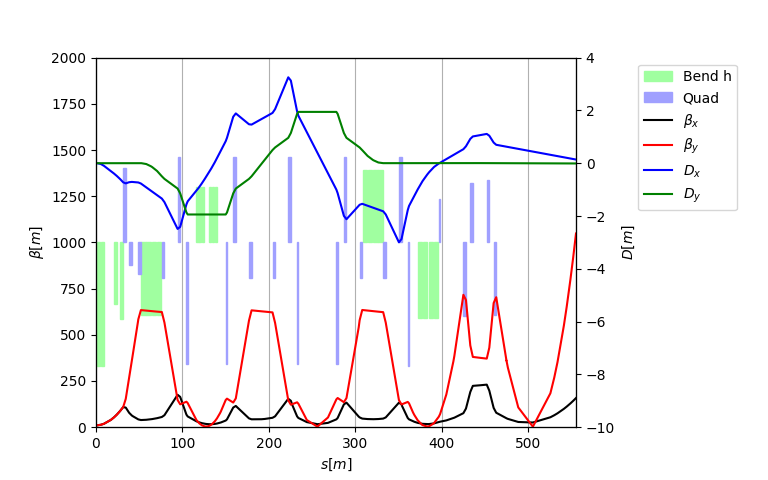

In [16]:
# Plot the twiss table
tplt = tw.plot()
tplt.ylim(left_lo=0, left_hi=2e3, right_lo=-10, right_hi=4)

### Insert markers for focus points

In [17]:
%%capture
s_focus = np.linspace(490., 540., 9)
line.discard_tracker()
line.replace_all_repeated_elements() # Needed to slice (for now)
for ii, ss in enumerate(s_focus):
    line.insert_element(element=xt.Marker(), name=f'ff_{ii+1}', at_s=ss)

In [18]:
# Betas at the focus points
tw = line.twiss(betx=10, bety=10)
tw.rows['ff_.*'].cols['s betx bety dx dy']

TwissTable: 9 rows, 6 cols
name             s          betx          bety            dx            dy
ff_1           490       26.9944       87.4269      0.533087  -0.000862047
ff_2        496.25       23.9595       29.8569      0.495271   -0.00174154
ff_3         502.5       24.2254       4.02519      0.457455   -0.00262103
ff_4        508.75       27.7919       9.93162       0.41964   -0.00350052
ff_5           515       34.6592       47.5762      0.381824      -0.00438
ff_6        521.25       44.8272       116.959      0.344008   -0.00525949
ff_7         527.5       58.2958        218.08      0.306192   -0.00613898
ff_8        533.75       75.0652       350.939      0.268376   -0.00701847
ff_9           540       95.1354       515.536       0.23056   -0.00789796

### Optics matching at one of the focus points

In [19]:
# Create optimizer objects
opt = line.match(
    solve=False,
    betx=10, bety=10, alfx=0, alfy=0,
    vary=xt.VaryList(['kq10', 'kq11', 'kq12', 'kq13', 'kq14', 'kq15', 'kq16'], step=1e-3),
    targets=[
        xt.TargetSet(at='ff_5', 
                     betx=xt.LessThan(20), bety=xt.LessThan(15),
                     alfx=0, alfy=0, dx=0, dy=0),
        xt.TargetSet(at='xced.x0410440', 
                     betx=xt.LessThan(750), bety=xt.LessThan(750),
                     alfx=0, alfy=0),
        xt.TargetSet(at='xcsv.x0410384',
                     betx=xt.LessThan(40), bety=xt.LessThan(40),
                     alfx=0),
    ]
)

# Control individual weights
opt.targets['ff_5_dx'].weight = 10000
opt.targets['ff_5_dy'].weight = 10000
opt.targets['ff_5_alfx'].weight = 10
opt.targets['ff_5_alfy'].weight = 10

In [20]:
# Inspect targets
opt.target_status()

Target status:                          
id state tag                tol_met       residue   current_val target_val    description                                 
0  ON    ff_5_betx            False      -14.6592       34.6592 LessThan(20)  line=h6, ('betx', 'ff_5'), val=LessThan( ...
1  ON    ff_5_bety            False      -32.5762       47.5762 LessThan(15)  line=h6, ('bety', 'ff_5'), val=LessThan( ...
2  ON    ff_5_alfx            False      -0.68141      -0.68141 0             line=h6, ('alfx', 'ff_5'), val=0, tol=1e ...
3  ON    ff_5_alfy            False       -4.2811       -4.2811 0             line=h6, ('alfy', 'ff_5'), val=0, tol=1e ...
4  ON    ff_5_dx              False      0.381824      0.381824 0             line=h6, ('dx', 'ff_5'), val=0, tol=1e-0 ...
5  ON    ff_5_dy              False      -0.00438      -0.00438 0             line=h6, ('dy', 'ff_5'), val=0, tol=1e-0 ...
6  ON    xced.x0410440_betx    True             0       224.211 LessThan(750) line=h6, ('betx', 'x

In [21]:
# Run optimization
opt.step(40)

                                             
Optimize - start penalty: 3819          
Matching: model call n. 499               
Optimize - end penalty:  5.46966


In [22]:
# Inspect targets
opt.target_status()

Target status:                            
id state tag                tol_met       residue   current_val target_val    description                                 
0  ON    ff_5_betx            False      -3.33151       23.3315 LessThan(20)  line=h6, ('betx', 'ff_5'), val=LessThan( ...
1  ON    ff_5_bety             True             0       13.1945 LessThan(15)  line=h6, ('bety', 'ff_5'), val=LessThan( ...
2  ON    ff_5_alfx            False    -0.0794817    -0.0794817 0             line=h6, ('alfx', 'ff_5'), val=0, tol=1e ...
3  ON    ff_5_alfy            False     0.0601521     0.0601521 0             line=h6, ('alfy', 'ff_5'), val=0, tol=1e ...
4  ON    ff_5_dx              False   2.01096e-05   2.01096e-05 0             line=h6, ('dx', 'ff_5'), val=0, tol=1e-0 ...
5  ON    ff_5_dy              False   2.10168e-05   2.10168e-05 0             line=h6, ('dy', 'ff_5'), val=0, tol=1e-0 ...
6  ON    xced.x0410440_betx    True             0       342.735 LessThan(750) line=h6, ('betx', 

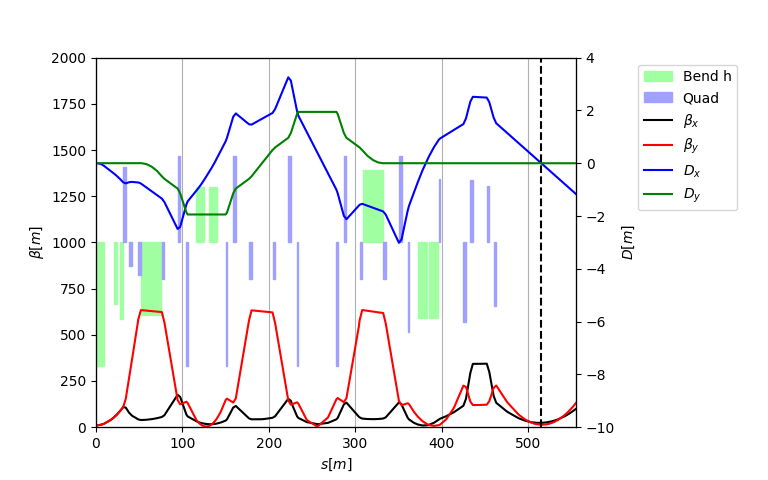

In [23]:
# Twiss after optimization
tw2 = line.twiss(betx=10, bety=10, alfx=0, alfy=0)

tplt2 = tw2.plot()
tplt2.ylim(left_lo=0, left_hi=2e3, right_lo=-10, right_hi=4)
plt.axvline(x=tw['s', 'ff_5'], color='k', linestyle='--')

### Compute beam sizes

In [24]:
bsz = tw2.get_beam_covariance(gemitt_x=2e-7, gemitt_y=5e-8)

In [25]:
# Show beam sizes at 'ff_5'
bsz.rows['ff_.*'].cols['s', 'sigma_x', 'sigma_y'].show()

name             s       sigma_x       sigma_y
ff_1           490     0.0030435    0.00178524
ff_2        496.25    0.00266512    0.00145243
ff_3         502.5    0.00236997    0.00115289
ff_4        508.75    0.00219193   0.000919718
ff_5           515    0.00216016   0.000812234
ff_6        521.25    0.00228078    0.00087789
ff_7         527.5    0.00253211    0.00108572
ff_8        533.75    0.00288012    0.00137259
ff_9           540    0.00329432    0.00169892


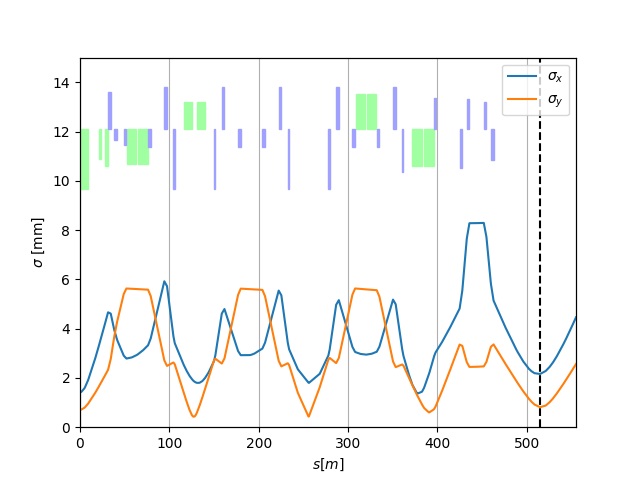

In [26]:
plt.figure()
ax = plt.gca()

# Plot the lattice
bsplt = tw.plot(lattice_only=True, ax=ax)

# Plot beam sizes on top
ax = bsplt.left
ax.plot(bsz.s, 1e3*bsz.sigma_x, label=r'$\sigma_x$')
ax.plot(bsz.s, 1e3*bsz.sigma_y, label=r'$\sigma_y$')

# Adjust figure
ax.set_ylabel(r'$\sigma$ [mm]')
ax.legend(loc='upper right')
bsplt.lattice.set_ylim(-5, 1.2)
ax.set_ylim(0, 15)
plt.axvline(x=tw['s', 'ff_5'], color='k', linestyle='--')

### Study dependence of the beam trajectory on initial conditions

Trajectory with $x_0$ = 1 mm

In [27]:
tw_1mm = line.twiss(betx=10, bety=10, x=1e-3)

Trajectory with $x'_0$ = 1 mrad

In [28]:
tw_1mrad = line.twiss(betx=10, bety=10, px=1e-3)

Trajectory with $\delta_0$ = 1%

In [29]:
tw_1percent = line.twiss(betx=10, bety=10, delta=0.01)

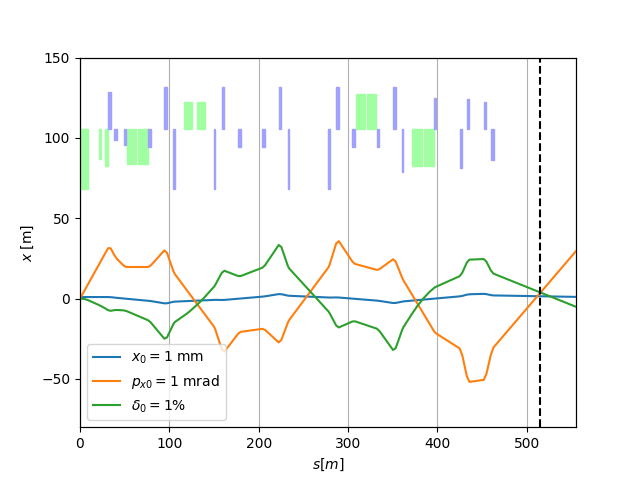

In [30]:
# Plot the three trajectories
plt.figure()
ax = plt.gca()

# Plot lattice
pp = tw.plot(lattice_only=True, ax=ax)
ax = pp.left

# Plot trajectories
ax.plot(tw_1mm.s, 1e3*tw_1mm.x, label=r'$x_0=1$ mm')
ax.plot(tw_1mrad.s, 1e3*tw_1mrad.x, label=r'$p_{x0}=1$ mrad')
ax.plot(tw_1percent.s, 1e3*tw_1percent.x, label=r'$\delta_0=1\%$')

# Adjust plot
ax.legend(loc='lower left')
ax.set_ylabel(r'$x$ [m]')
pp.lattice.set_ylim(-5, 1.2)
ax.set_ylim(-80, 150)
plt.axvline(x=tw['s', 'ff_5'], color='k', linestyle='--')

### Compute R matrix

In [31]:
rmat = tw.get_R_matrix_table()

In [32]:
rmat

Table: 243 rows, 39 cols
name                     s                R_matrix           r11           r12           r13 ...
t4..centre               0 <array of shape (6, 6)>             1   4.75949e-49             0
drift_1                  0 <array of shape (6, 6)>             1   4.75949e-49             0
beg.vac.0            1.101 <array of shape (6, 6)>             1         1.101             0
drift_2              1.101 <array of shape (6, 6)>             1         1.101             0
mtn.x0400003       1.35002 <array of shape (6, 6)>             1       1.35002             0
drift_3            4.95005 <array of shape (6, 6)>             1       4.94995   -2.0783e-08
mtn.x0400007       5.55007 <array of shape (6, 6)>             1       5.54998  -2.77104e-08
drift_4             9.1501 <array of shape (6, 6)>             1        9.1499  -9.04152e-08
end.vac.0          16.6111 <array of shape (6, 6)>             1       16.6109  -2.64174e-07
drift_5            16.6111 <array of shap

### Generate strengths tables

In [33]:
tt_vars = line.vars.get_table()

In [34]:
tt_kbkq = tt_vars.rows['kb.*|kq.*']

In [35]:
tt_kbkq.show()

name         value expr
kb3t       -0.0126 None
kb1        -0.0056 None
kb2         -0.007 None
kq1      0.0216291 None
kq2    -0.00666407 None
kq3    -0.00928836 None
kb3      -0.010254 None
kq4     -0.0103353 None
kq5      0.0247478 None
kq6     -0.0351545 None
kb4      0.0039634 None
kb7      0.0039634 None
kq7      0.0247531 None
kq8     -0.0103718 None
kq9      0.0247479 None
kq10    -0.0103841 None
kb5      0.0102723 None
kq11     -0.025526 None
kb6        -0.0108 None
kq12     0.0181688 None
kq13    -0.0226735 None
kq14     0.0177024 None
kq15     0.0159787 None
kq16    -0.0182086 None


In [36]:
## Get a dictionary
tt_kbkq.to_dict()

{'kb3t': -0.0126,
 'kb1': -0.0056,
 'kb2': -0.007,
 'kq1': 0.021629069046,
 'kq2': -0.0066640693837499996,
 'kq3': -0.009288356096249999,
 'kb3': -0.010254,
 'kq4': -0.010335260249999999,
 'kq5': 0.024747814395,
 'kq6': -0.03515453708625,
 'kb4': 0.0039634,
 'kb7': 0.0039634,
 'kq7': 0.0247531356675,
 'kq8': -0.0103717596825,
 'kq9': 0.024747851868749997,
 'kq10': -0.010384130653545888,
 'kb5': 0.0102723,
 'kq11': -0.025525993943519596,
 'kb6': -0.0108,
 'kq12': 0.01816881097432716,
 'kq13': -0.02267351178157636,
 'kq14': 0.017702448820432124,
 'kq15': 0.015978694665480762,
 'kq16': -0.018208582719823733}